# 유방암 데이터
- 10, 5, 2 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화
- 군집화하기
- 군집화 성능 평가

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

- 데이터 정규화

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원 축소

In [5]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca5 = PCA(n_components=5)
pca10 = PCA(n_components=10)

In [6]:
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca10 = pca10.fit_transform(cancer_std)

- 분류 정확도

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# 정규화된 오리지널 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.993006993006993

In [10]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=2021
    )
    lrc = LogisticRegression(random_state=2021)
    lrc.fit(X_train, y_train)
    score = lrc.score(X_test, y_test)
    return np.round(score, 4)

In [11]:
print('PCA 2 정확도:', pca_accuracy(cancer_pca2, cancer.target))
print('PCA 5 정확도:', pca_accuracy(cancer_pca5, cancer.target))
print('PCA 10 정확도:', pca_accuracy(cancer_pca10, cancer.target))
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.993
PCA 10 정확도: 0.986
원데이터 정확도: 0.993


- globals() : 전역 변수를 딕셔너리에 담아두기

In [15]:
for dim in [2,5,10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancer_pca{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancer_pca{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.993
PCA 10 정확도: 0.986
원데이터 정확도: 0.993


- 군집화

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)
df['cluster'] = kmeans.labels_

In [17]:
df = df[['target','cluster']]
df['PC1'] = cancer_pca2[:,0]
df['PC2'] = cancer_pca2[:,1]
df.head(3)

,target,cluster,PC1,PC2
0,0,0,9.192837,1.948583
1,0,0,2.387802,-3.768172
2,0,0,5.733896,-1.075174


- 시각화하기

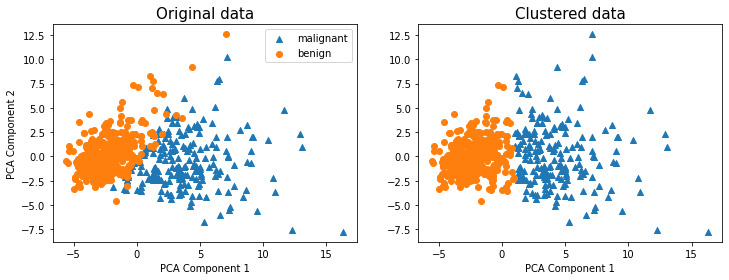

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(['^','o']):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=cancer.target_names[i])

    if k == 0:          # Original
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:               # Cluster
        ax.set_title('Clustered data', fontsize=15)
    ax.set_xlabel('PCA Component 1')
plt.show()

- 군집화 성능 평가

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(cancer_std, df.cluster)

0.3433822406907781

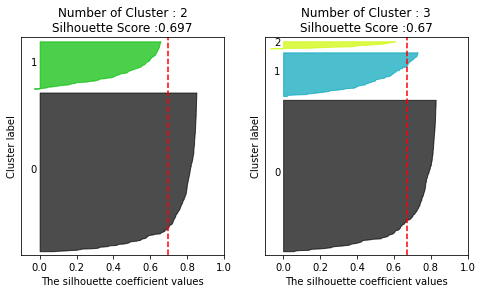

In [22]:
from visualize import visualize_silhouette
visualize_silhouette([2,3], cancer.data)